<a href="https://colab.research.google.com/github/honhon13/sample/blob/main/Deep_Learning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Design and training of your own neural network

In the following lab, we want to recreate the playground we just learned about using the PyTorch package. We thus learn tensors, which is the tool of choice for training neural networks, and try to better understand the structure of a neural network. The aim of this lab should be that you now try to recreate the neural network you have previously built yourself. You are welcome to work on the lab alone or with your neighbor. Ok, let's get started!

# Generation of data

Depending on whether you have chosen a classification problem or a regression problem, we should rebuild the corresponding data set.

I have decided on a binary classification problem and would now like to rebuild the data set with the circle and the ring. I use the `sklearn` package for this:

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=10000, noise=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=42)

To get a better understanding of your data, please 1) decide which data you would like to select. (You can also use the circle/ring in the first step and then try to select a different data set in the next step). 2) To get a better idea of your data, I ask you to visualize it.

Further dataset generators can be found under the following link: https://scikit-learn.org/stable/datasets/sample_generators.html

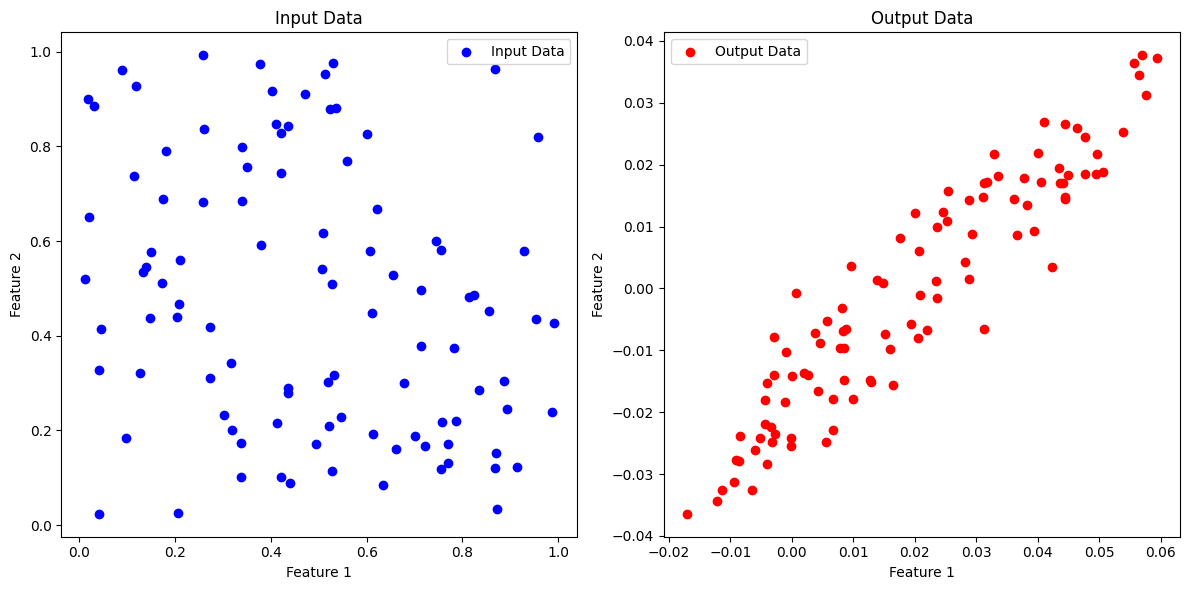

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the custom dense layer
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, input_dim, output_dim):
        super(MyDenseLayer, self).__init__()
        self.W = self.add_weight(
            shape=(input_dim, output_dim),
            initializer="random_normal",
            trainable=True
        )
        self.b = self.add_weight(
            shape=(output_dim,),
            initializer="zeros",
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.W) + self.b
        return z  # Return the computed value

# Step 1: Generate random input data
input_dim = 2
output_dim = 2
num_samples = 100

# Random data points
input_data = np.random.rand(num_samples, input_dim)

# Step 2: Initialize the custom layer
dense_layer = MyDenseLayer(input_dim=input_dim, output_dim=output_dim)

# Apply the custom layer to the input data
output_data = dense_layer(input_data).numpy()

# Step 3: Visualize the data
def visualize_data(input_data, output_data):
    plt.figure(figsize=(12, 6))

    # Input Data
    plt.subplot(1, 2, 1)
    plt.scatter(input_data[:, 0], input_data[:, 1], c='blue', label='Input Data')
    plt.title("Input Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    # Output Data
    plt.subplot(1, 2, 2)
    plt.scatter(output_data[:, 0], output_data[:, 1], c='red', label='Output Data')
    plt.title("Output Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualize the data
visualize_data(input_data, output_data)

In [2]:
# YOUR TASK
import tensorflow as tf

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self,input_dim, output_dim):
    super(MyDenseLayer, self).__init__()

self.W = self.add_weight([input_dim, output_dim])
self.b = self.add_weight([1, output_dim])

def call(self, inputs):
  z = tf.matmul(inputs, self.W) + self.b




NameError: name 'self' is not defined

#Tensors

PyTorch relies on tensors (https://pytorch.org/docs/stable/tensors.html) to manipulate and process data during training, a concept we'll delve deeper into.

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for `colour_channels`, `height` and `width`.

Let's create some tensors and check their dimension and shape! Therefore I ask you to work together in pairs and try to find out which information is returned with the methods (ndim, shape, item) of the class tensor. Go through line by line and try to understand the output behind it.

In [ ]:
import torch
# Scalar
scalar = torch.tensor(7)

print("------------")
print("Scalar:")
print(scalar)
print(scalar.ndim)
print(scalar.shape)
print(scalar.item())
print("------------")

# Vector
vector = torch.tensor([1, 2, 3, 4, 5])
vector[1]

print("Vector:")
print(vector)
print(vector.ndim)
print(vector.shape)
print(vector[3].item())
print("------------")

# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
print("Matrix:")
print(MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)
print(MATRIX[1][1].item())
print("------------")

# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
print("Tensor:")
print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)
print(TENSOR[0][2][2].item())
print("------------")

------------
Scalar:
tensor(7)
0
torch.Size([])
7
------------
Vector:
tensor([1, 2, 3, 4, 5])
1
torch.Size([5])
4
------------
Matrix:
tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])
10
------------
Tensor:
tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])
5
------------


In [ ]:
T = torch.tensor([[[[1, 2, 3],[3, 6, 9],[2, 4, 5]]]])
T.shape

torch.Size([1, 1, 3, 3])

Ok let's summarize what tensors are with the last example, whose outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> **Note:** You might've noticed me using lowercase letters for `scalar` and `vector` and uppercase letters for `MATRIX` and `TENSOR`. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as `y` or `a`. And matrices and tensors denoted as uppercase letters such as `X` or `W`.
>
> You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor` (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction, but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

##What is a major advantage of using tensors?

A tensor can be created with `requires_grad=True` so that torch.autograd records operations on them for automatic differentiation. Take a look at the following example:

In [ ]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
# We create a function out: R^(2,2) -> R
out = x.pow(2).sum()
# And determine the first derivative in all directions of the tensor.
out.backward()
# The gradient created is stored in the tensor.
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

As you think about the content you worked on earlier, discuss where this could be a big advantage!

#Preparation of the data

Our goal now is to convert our data into tensors, which we achieve by creating our own class `Data`. This class is inherited from the superclass `Dataset`. The `__init__` constructor, is used in Python to initialize objects of a class. `X` is the input to the model and `y` are the labels. `__getitem__` is a method that allow us to to get an item of our training dataset.

Look at the code and try to understand what happens in the class and also look at the code afterwards.

Discuss with your partner what happens with our training data. Why do we need batches? Try to connect this to the lecture you listened to before.


In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

batch_size = 64

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch}")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    if batch == 4:
      break

Batch: 0
Shape of X: torch.Size([64, 2])
Shape of y: torch.Size([64])
Batch: 1
Shape of X: torch.Size([64, 2])
Shape of y: torch.Size([64])
Batch: 2
Shape of X: torch.Size([64, 2])
Shape of y: torch.Size([64])
Batch: 3
Shape of X: torch.Size([64, 2])
Shape of y: torch.Size([64])
Batch: 4
Shape of X: torch.Size([64, 2])
Shape of y: torch.Size([64])


#Model Architecture
The following code now creates the architecture of our model. Here I ask you to be creative and implement the same model as you have created in the Playground. Please work together again and try to understand every line of code for the first time. I have tried to document the code as well as possible. After that you can build your own model by adjusting the dimensions, adding layers, etc.

Our neural network is also designed as a separate class, which is inherited from the `nn.module` class. The layers including their dimensions and their initialization are determined in the constructor. In the forward process, you define how the layer and activation functions are executed one after the other.

In [ ]:
import torch
from torch import nn
from torch import optim

input_dim = 2 # Dimension of the input = amount of features, which is in our case x_1 and x_2.
output_dim = 1 # Dimension of the output = 1, since we have a binary classification.

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # Defininition of several layers
        self.layer_1 = nn.Linear(input_dim, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, output_dim)
        # Random Initialization of the weights -> Can be done, we try it without!
        # nn.init.normal_(self.layer_1.weight, mean=0, std=0.01)
        # nn.init.normal_(self.layer_1.bias, mean=0, std=0.01)

    # Definition of the forward process, including the interaction of layers and the activation functions
    def forward(self, x):
        x = self.layer_1(x)
        x = torch.nn.functional.relu(x)
        x = self.layer_2(x)
        x = torch.nn.functional.relu(x)
        x = self.layer_3(x)
        # The last activation function should be suitable to our problem!!
        # (eg. sigmoid for binary classifcation, softmax for multi-class classification...)
        x = torch.nn.functional.sigmoid(x)
        return x

model = NeuralNetwork(input_dim, output_dim)
print(model)


NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


For your task, I suggest that you do some research on the most common activation functions used for different tasks. Choose two significant ones that apply to your problem and try to visualize them.

In [ ]:
# YOUR TASK

#Definition loss function and learning rate

In the next lines, we determine how to optimize the parameters of the neural network. To do this, we select a learning rate, a suitable loss function (this must be suitable for our problem, e.g. for regression we should use `torch.nn.L1Loss` or `torch.nn.MSELoss`).

In [ ]:
learning_rate = 0.05

# The loss function must be suitable for our classification/regression problem!
loss_function = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Hint:
# You can try a different optimizer, if SGD won't minimize your loss!
# learning_rate = 0.001
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training

Let's proceed with training our neural network! The variable `num_epochs` denotes the total number of complete passes through all the data during the training process. `loss_values` stores the loss values by appending them to the list.

**Task:**


* Try to go through the code and understand every line.
* Research what happens to the tensor with `y.unsqueeze(-1)`.
* After your neural network has completed training, please visualize the loss graphically, with the epochs on the x-axis.



In [ ]:
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = model(X)
        loss = loss_function(pred, y.unsqueeze(-1))
        # adding loss to our list
        loss_values.append(loss.item())
        # computation of derivatives (backpropagation)
        loss.backward()
        # changing parameters of the model (optimize)
        optimizer.step()

print("Training Complete!")

In [ ]:
# Your Task

#Testing our model

We'd now like to evaluate our model on the test dataset to measure its accuracy in predicting new data. Establishing a reliable measure is crucial; in binary classification scenarios like ours, accuracy serves as a simple indicator. It involves counting the number of correct predictions against the number of incorrect predictions.

In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = [0 if val < 0.5 else 1 for val in outputs.numpy()]
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the {total} test instances: {100 * correct // total}%')

When you have solved all the tasks and you are satisfied with your model, please upload your solution via Git-Lab :)